# PROJETO FINAL
INTRODUÇÂO AO PROCESSAMENTO DE IMAGENS


Prof. Bruno Luiggi Macchiavello Espinoza


- Lucas Corrêa Boaventura - 211038262

- Gustavo - 

## Bibliotecas

In [123]:
import numpy as np
from PIL import Image
from IPython.display import display
import cv2
import matplotlib.pyplot as plt
from glob import glob
from skimage import img_as_float
from skimage.segmentation import morphological_geodesic_active_contour, inverse_gaussian_gradient
from skimage.draw import circle_perimeter
from skimage.segmentation import chan_vese


In [124]:
def READ(image):
    image = cv2.imread(image)
    resized_image = cv2.resize(image, (240,240), interpolation=cv2.INTER_LINEAR)
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    return gray
    
def blurred(image, a):
    blurred_image = cv2.GaussianBlur(image, (a, a), 0)
    return blurred_image

In [125]:
# import os
# image_paths = glob("./dataset/*")
# image_paths
# dataset=([(Image.open(path)) for path in image_paths])

# rgb_imgs=([cv2.cvtColor(np.array(arr), cv2.COLOR_RGBA2RGB) for arr in dataset])
# for i in rgb_imgs:
#     (Image.fromarray(i))

In [126]:
class my_DataSet():
    def __init__(self, path) -> None:
        self.__dataset = np.array([np.array(Image.open(p).resize((240, 240))) for p in glob(path)])
        self.__orig_sizes = np.array([np.array(Image.open(p).size) for p in glob(path)])
        self.__names = np.array([p.split("/")[-1] for p in glob(path)])
    
    def get(self, *i) -> np.array:
        return self.__dataset[i]
    
    def get_names(self, *i) -> np.array:
        return self.__names[i].split("\\")[-1].split(".")[0]
    
    def get_gray(self,*i) -> np.array:
        return np.array([cv2.cvtColor(arr, cv2.COLOR_RGB2GRAY) for arr in self.__dataset])[i]
    
    def show(self) -> None:
        for arr in self.__dataset:
            display(Image.fromarray(arr))

    def show_orig(self) -> None:
        for i,arr in enumerate(self.__dataset):
            display(Image.fromarray(arr).resize(self.__orig_sizes[i]))

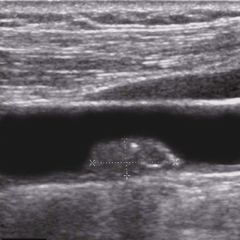

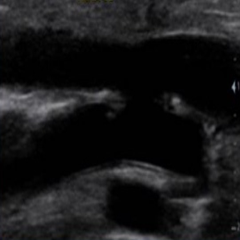

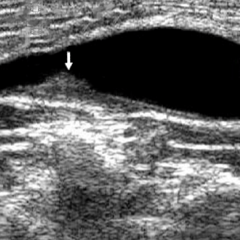

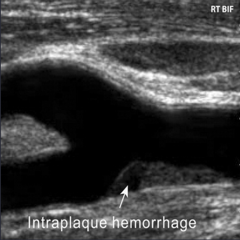

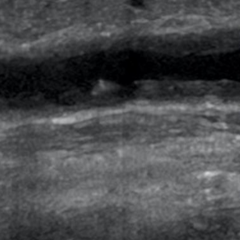

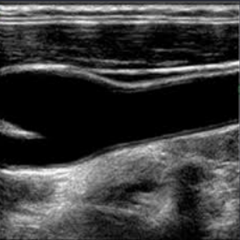

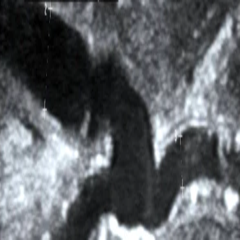

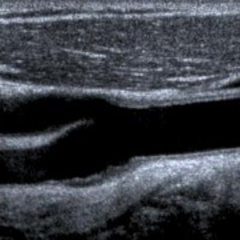

In [127]:
dataset = my_DataSet("./dataset/*")
dataset.show()

## Thresholding

### Global

In [128]:
# img_low_filter = cv2.GaussianBlur(gray_img, (5, 5), 0)
# Image.fromarray(img_low_filter)

In [129]:
# histograma = cv2.calcHist([img_low_filter], [0], None, [256], [0, 256])
# plt.figure(figsize=(5, 3))
# plt.plot(histograma, color='black')
# plt.title('Imagem original')
# plt.xlabel('Intensidade de Cinza')
# plt.ylabel('Número de Pixels')
# plt.grid()
# plt.show()

Método OTSU


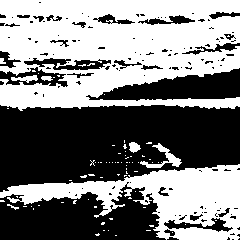

Método OTSU


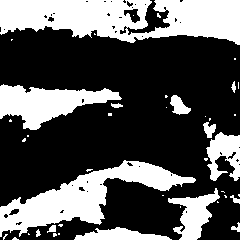

Método OTSU


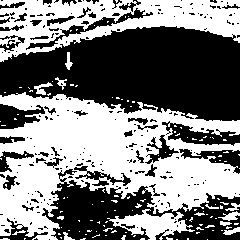

Método OTSU


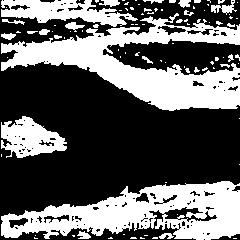

Método OTSU


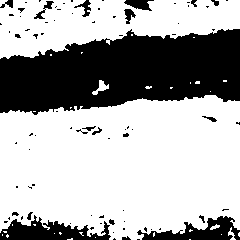

Método OTSU


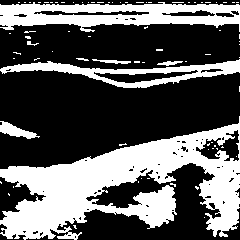

Método OTSU


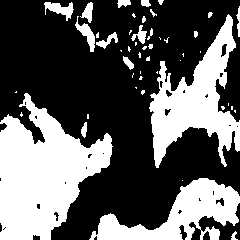

Método OTSU


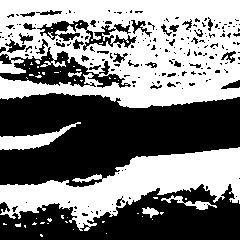

In [130]:
for gray_img in dataset.get_gray():
    _, img_bin = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # _, img_bin_dps_filtro = cv2.threshold(img_low_filter, 0, 255, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)

    print("Método OTSU")
    display(Image.fromarray(img_bin))
    # print("Método OTSU após um filtro Gaussiano")
    # Image.fromarray(img_bin_dps_filtro)

### Local

arteria2


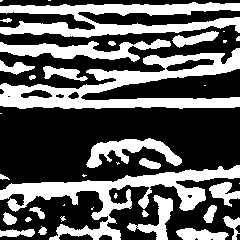

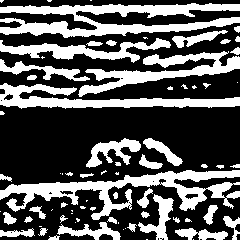

arteria_dupla


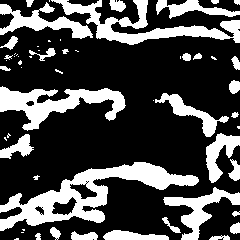

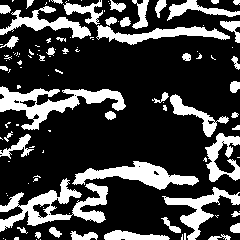

arteria_grossa


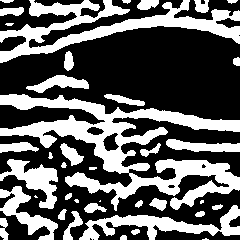

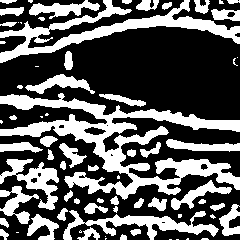

arteria_hemorrogica


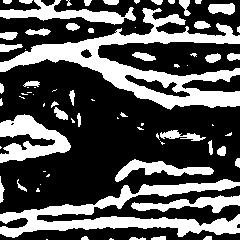

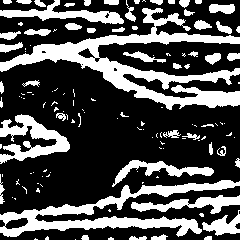

arteria_simples


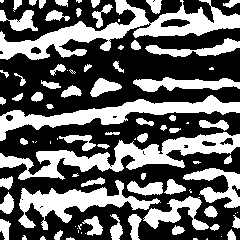

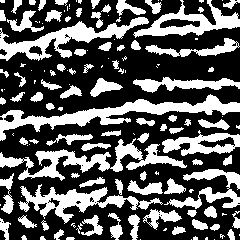

bifurcacao2


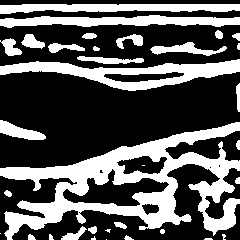

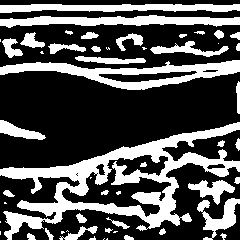

ponte_safena


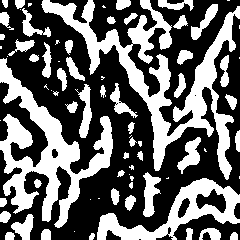

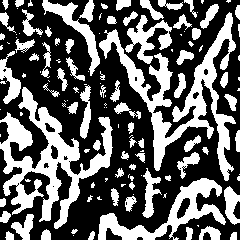

tatiana


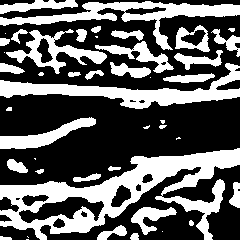

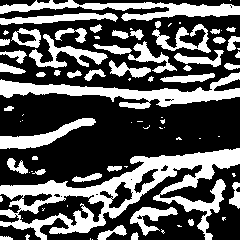

In [131]:
for i,gray_img in enumerate(dataset.get_gray()):
    blurred = cv2.GaussianBlur(gray_img, (15, 15), 0)

    thresh_mean = cv2.adaptiveThreshold(
        blurred, 
        255, 
        cv2.ADAPTIVE_THRESH_MEAN_C, 
        cv2.THRESH_BINARY , 
        19,  # Tamanho do bloco (área local)
        0    # Constante subtraída da média
    )

    # Aplicar Threshold Adaptativo - Método Gaussiano
    thresh_gaussian = cv2.adaptiveThreshold(
        blurred, 
        255, 
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY, 
        19,  # Tamanho do bloco (área local)
        0    # Constante subtraída da média ponderada
    )
    print(dataset.get_names(i))

    display(Image.fromarray(thresh_mean))
    display(Image.fromarray(thresh_gaussian))


## Baseados em contornos



In [132]:
## Função para aplicar o filtro de Sobel
def Sobel(image):
    # Convertendo para escala de cinza
    blurr = blurred(image, 15)
    # Aplicando o filtro Sobel nas direções x e y
    sobel_x = cv2.Sobel(blurr, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(blurr, cv2.CV_64F, 0, 1, ksize=3)
    
    # Calculando a magnitude total do gradiente
    sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)
    
    # Normalizando para exibir corretamente
    sobel_combined = cv2.convertScaleAbs(sobel_combined)
    
    return sobel_combined

def Canny(image):
    edges = cv2.Canny(image, 100, 200)
    
    return edges

In [133]:
image = READ('./dataset/tatiana.png')

# Aplicar o filtro de Sobel
sobel_image = Sobel(image)
canny_image = Canny(image)


display(Image.fromarray(sobel_image))

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(sobel_image, cmap='gray')
plt.title('Sobel Edge Detection')
plt.show()

display(Image.fromarray(canny_image))
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 2)
plt.imshow(canny_image, cmap='gray')
plt.title('Detecção de Contorno (Canny)')
plt.show()

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
# Função para aplicar a detecção de bordas com Laplaciano
def LaplacianEdge(image):
    filtered_image = cv2.Laplacian(image, ksize=1, ddepth=cv2.CV_16S)
    filtered_image = cv2.convertScaleAbs(filtered_image)
    
    
    return filtered_image
    
def post_processing(image):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    
    _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    closing_image = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    opening_image = cv2.morphologyEx(closing_image, cv2.MORPH_OPEN, kernel)
    return opening_image


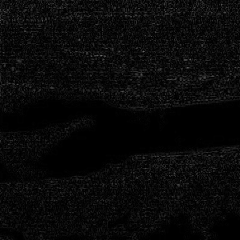

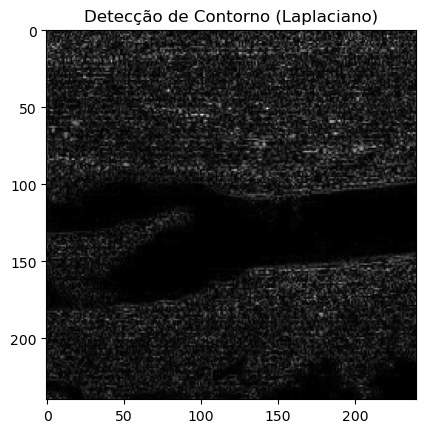

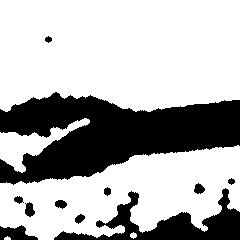

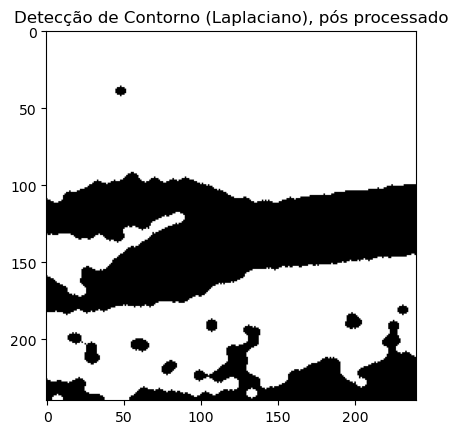

In [ ]:


# Carregar a imagem
image = READ('tatiana.png')

laplacian_image = LaplacianEdge(image)
post_laplacian = post_processing(laplacian_image)

display(Image.fromarray(laplacian_image))

plt.imshow(laplacian_image, cmap='gray')
plt.title('Detecção de Contorno (Laplaciano)')
plt.show()

display(Image.fromarray(post_laplacian))
plt.imshow(post_laplacian, cmap='gray')
plt.title('Detecção de Contorno (Laplaciano), pós processado')
plt.show()



## Watershed

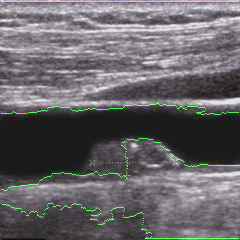

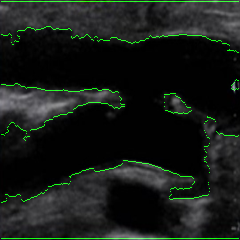

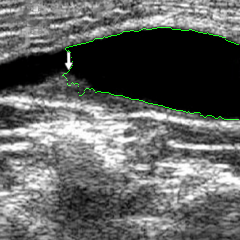

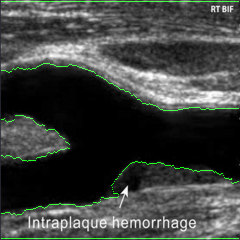

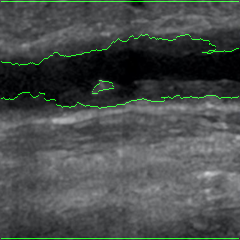

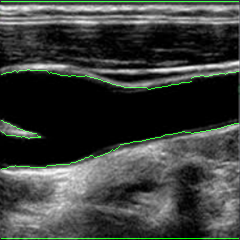

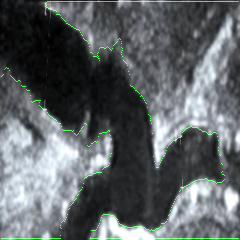

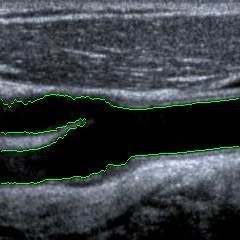

In [111]:
def kernel(shape=3) : return np.ones(shape, np.uint8)

manual_markers = [1,1,2,1,1,1,1,2]
for i, (array_orig,gray_img) in enumerate(zip(dataset.get(),dataset.get_gray())):
    # borrar e pegar threshold com OTSU
    blurred = cv2.GaussianBlur(gray_img, (15, 15), 0)
    (Image.fromarray(blurred))
    ret, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # pegar as regioes de certeza 
    sure_bg = cv2.dilate(thresh, kernel(), iterations=1)
    (Image.fromarray(sure_bg))

    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel(), iterations=2)
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 0)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    (Image.fromarray(sure_fg))


    unknown = cv2.subtract(sure_bg, sure_fg)
    (Image.fromarray(unknown))

    _, markers = cv2.connectedComponents(sure_fg)

    markers = markers + 1
    markers[unknown == 255] = 0
    markers = cv2.watershed(array_orig, markers)




    water_fill = np.zeros(array_orig.shape, dtype=np.uint8)
    water_fill[markers == manual_markers[i]] = [0,255,0] #selecionado manualmente a label que preencheu a area requerida

    erosion = cv2.erode(water_fill, kernel())
    contour = water_fill-erosion
    (Image.fromarray(contour))


    highlighted = cv2.addWeighted(array_orig, 1, contour,1, 0)
    display(Image.fromarray(highlighted))

## Snakes


In [ ]:
def snakes(image, init_level, ball, thresh):

    float_image = img_as_float(image)
    gradient = inverse_gaussian_gradient(float_image)
    init_level_set = np.zeros(image.shape, dtype=np.int8)
    rr, cc = circle_perimeter  (init_level[0], init_level[1], init_level[2])  # círculo inicial
    init_level_set[rr, cc] = 1
    
    snake = morphological_geodesic_active_contour(gradient, num_iter=160,
                                              init_level_set=init_level_set,
                                              smoothing=1, balloon=ball,
                                              threshold=thresh)
    return snake

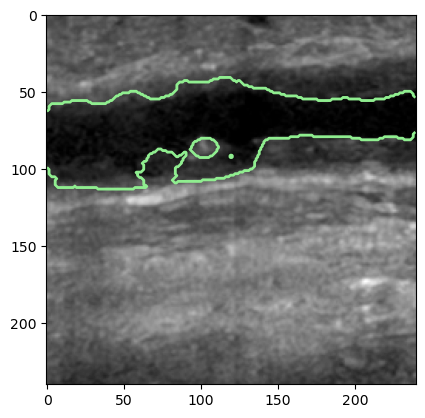

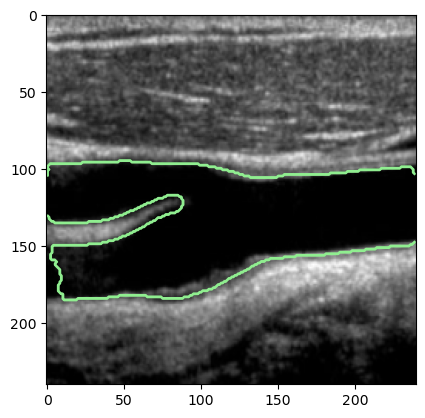

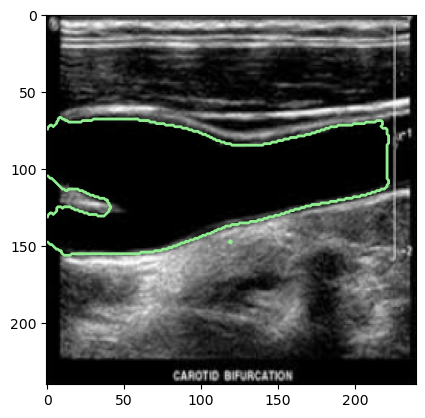

In [ ]:
image = READ('arteria_simples.jpg')
blurred_image = blurred(image, 15)
snake = snakes(blurred_image,(70,120,30), 9, 8)


plt.imshow(image, cmap="gray")
plt.contour(snake, 1, colors='lightgreen')
plt.show()

image = READ('tatiana.png')
blurred_image = blurred(image, 15)
snake = snakes(blurred_image,(150,130,30), 1, 0.9)

plt.imshow(image, cmap="gray")
plt.contour(snake, 1, colors='lightgreen')
plt.show()

image = READ('image1.jpeg')
blurred_image = blurred(image, 15)
snake = snakes(blurred_image,(120,130,30), 0.95, 0.9)

plt.imshow(image, cmap="gray")
plt.contour(snake, 1, colors='lightgreen')
plt.show()

In [ ]:
def segment(image, contour):
    segmentation = chan_vese(image, mu=0.25, lambda1=1, lambda2=1, max_num_iter=100, tol=1e-3)
    segmentation_binary = (segmentation * 255).astype(np.uint8)
    contours, hierarchy = cv2.findContours(segmentation_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(image, contours, contour, (0,255,0), 1)
    
    return image

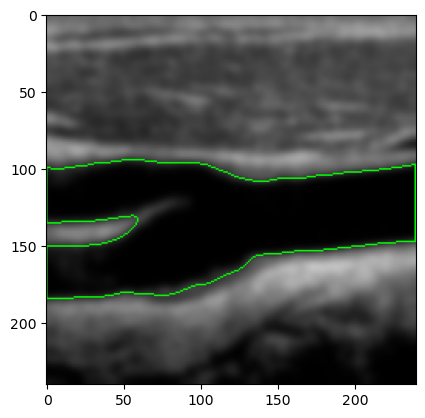

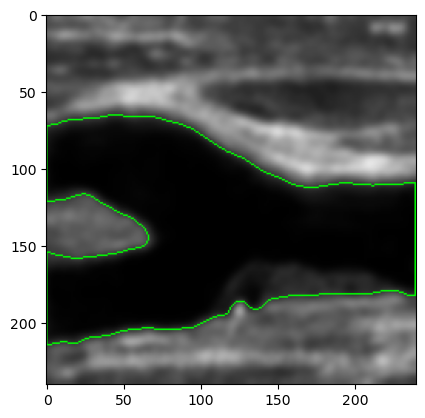

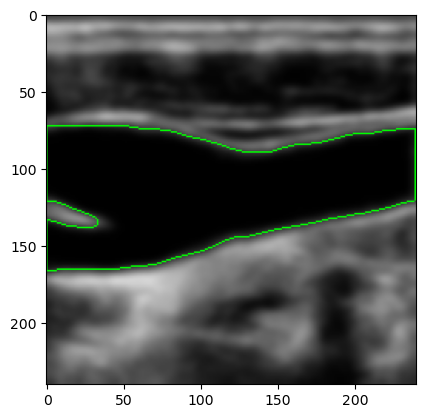

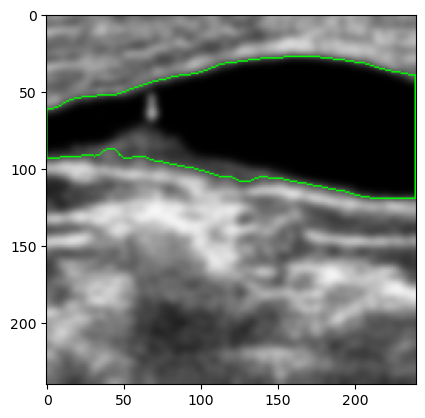

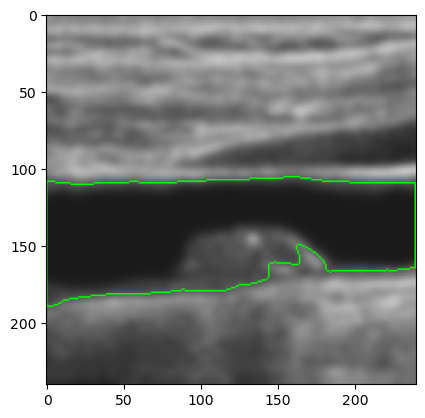

In [ ]:
image = READ('tatiana.png')
saida = segment(blurred(image, 15),2)
plt.imshow(saida, cmap="gray")
plt.show()

image = READ('image5.png')
saida = segment(blurred(image, 15), 4)
plt.imshow(saida, cmap="gray")
plt.show()

image = READ('image3.png')
saida = segment(blurred(image, 15), 6)
plt.imshow(saida, cmap="gray")
plt.show()

image = READ('image2.png')
saida = segment(blurred(image, 15), 9)
plt.imshow(saida, cmap="gray")
plt.show()

image = READ('image4.png')
saida = segment(blurred(image, 15), 2)
plt.imshow(saida, cmap="gray")
plt.show()



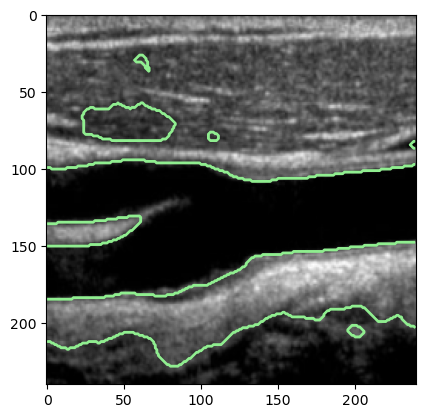

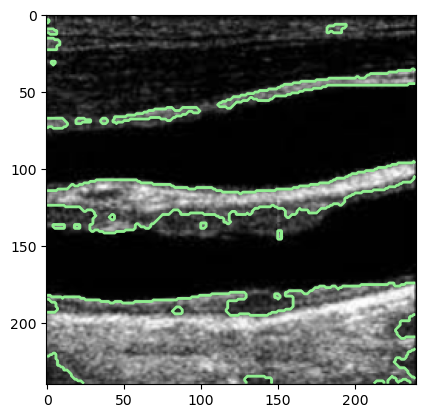

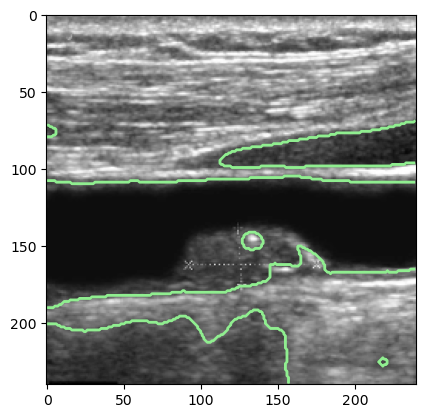

In [ ]:
image = READ('tatiana.png')
blurr = blurred(image, 15)
segmentation = chan_vese(blurr, mu=0.25, lambda1=2, lambda2=2, max_num_iter=100, tol=1e-3)
plt.imshow(image, cmap="gray")
plt.contour(255-segmentation, 1, colors='lightgreen')
plt.show()


image = READ('image1.png')
segmentation = chan_vese(image, mu=0.25, lambda1=2, lambda2=2, max_num_iter=100, tol=1e-3)
plt.imshow(image, cmap="gray")
plt.contour(255-segmentation, 1, colors='lightgreen')
plt.show()


image = READ('image4.png')
blurr = blurred(image, 15)
segmentation = chan_vese(blurr, mu=0.25, lambda1=1, lambda2=1, max_num_iter=100, tol=1e-3)
plt.imshow(image, cmap="gray")
plt.contour(segmentation, 1, colors='lightgreen')
plt.show()
